<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01332636/blob/main/Actividad_Semanal_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Repaso Transformación y reducción de dimensiones
##Datos generales
Nombre: Estefania Abigail Castro Belmont

Matrícula: A01332636

Materia: Ciencia y analítica de datos

Profesor: María de la Paz Rico Fernández

Tutor: Julio César Galindo López

Fecha: 27/10/2022

Actividad de la semana 5

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [31]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)

D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B = W.dot(D).dot(Winv)
#B= np.dot(W, values [:,np.newaxis] * Winv)
print(B.round(2))
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [54]:
#Matriz 1
###-----------------EJEMPLO DE EIGENVALORES

# define la matriz
Matriz_1 = array([[3,0,2], [3,0,-2], [0,1,1]])
print("---------------------------------Matriz original----------------------------------")
print(Matriz_1)

# calcula la eigendescomposicion
values, vectors = eig(Matriz_1)
print("-------------------------------------Valores--------------------------------------")
print(values) #D
print("-------------------------------------Vectores-------------------------------------")
print(vectors) #W


#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(Matriz_1)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("--------------------------------Matriz reconstruida-------------------------------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------

B = W.dot(D).dot(Winv)
print(B.round())
print("--------------------------------Matriz real-------------------------------")
B=B.real
print(B.round())

---------------------------------Matriz original----------------------------------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------------------------------------Valores--------------------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
-------------------------------------Vectores-------------------------------------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
--------------------------------Matriz reconstruida-------------------------------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
--------------------------------Matriz real-------------------------------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]


##Comentario
Al trabajar con esta matriz lo primero que llamó mi atención fue que se obtuvieron valores ### + ##.##**j**. En python 1j, o 0+1j es un tipo de número complejo. Lo que nos da a entender que nuestra matriz dio resultados complejos porque una parte de ellos es imaginaria (es una raíz de un número negativo). Es por ello que pasé la matriz B a números reales (.real regresa la parte real el argumento complejo). De esta forma logramos obtener nuevamente la matriz inicial. 

In [39]:
#Matriz 2
###-----------------EJEMPLO DE EIGENVALORES

# define la matriz
Matriz_2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(Matriz_2)
print("-----------Valores-----------")
# calcula la eigendescomposicion
values, vectors = eig(Matriz_2)
print(values) #D
print("-----------Vectores-----------")
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(Matriz_2)

W = vectors
Winv = np.linalg.inv(W)
#Winv = W.transpose()
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B = W.dot(D).dot(Winv)
print(B.round(2))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------Valores-----------
[ 3. -2.  1.]
-----------Vectores-----------
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


##Comentario
En la matriz 2 no surgió el mismo problema de los números complejos. En esta ocasión observamos que los valores son enteros y el segundo es negativo. Sólo hay que recordar que la multiplicación entre matrices se realiza utilizando .dot y que al final debemos redondear los números para que nos regrese el entero más cercano y así obtener la matriz original. 

In [53]:
#Matriz 3
###-----------------EJEMPLO DE EIGENVALORES

# define la matriz
Matriz_3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("------- Matriz 3 -------")
print(Matriz_3)
# calcula la eigendescomposicion
values, vectors = eig(Matriz_3)
print("-------------Valores--------------")
print(values) #D
print("-------------Vectores--------------")
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(Matriz_3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz 3, reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------

B = W.dot(D).dot(Winv)
print(B.round())
print("----Matriz 3, valores absolutos-----")
print(abs(B.round()))

------- Matriz 3 -------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------------Valores--------------
[ 6.89167094 -0.214175   -0.67749594]
-------------Vectores--------------
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz 3, reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
----Matriz 3, valores absolutos-----
[[ 5.  4.  0.]
 [ 1.  0.  1.]
 [10.  7.  1.]]


##Comentario
Al igual que en la matriz 2, la matriz no tiene el problema de los números complejos. Sin embargo, debido a los decimales obtuvimos valores inferiores (negativos) a 0 en donde debería dar cero, sin llegar a ser -1. Notamos que los valores de la matriz original son en su totalidad positivos, por lo que una forma sencilla de resolver el problema es convertir la matriz resultante (con los -0) a valores absolutos. Cabe recalcar que esta solución la pudimos implementar a toda la matriz, pero no funcionaría si en la matriz original hubieramos tenido valores negativos. Si fuera el caso la modificación al valor absoluto habría tenido que ser específicamente a cada valor negativo que se desea cambiar. En resto del proceso se mantiene igual al del resto de las matrices trabajadas. 

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


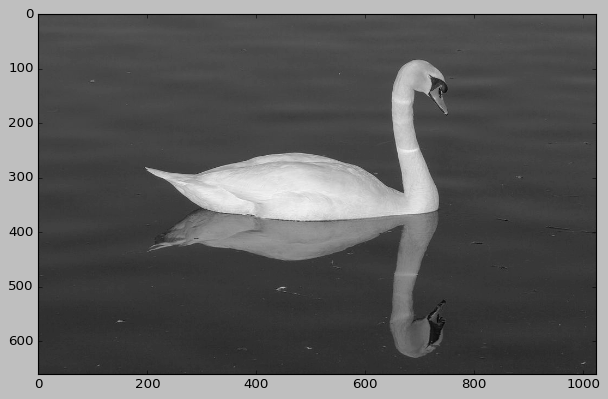

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FC8FE6729D0>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

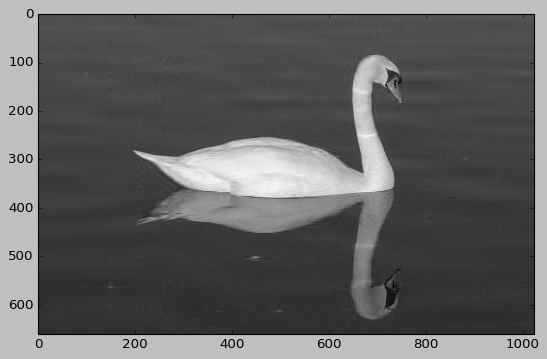

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

[31. 35. 34. ... 80. 85. 85.]


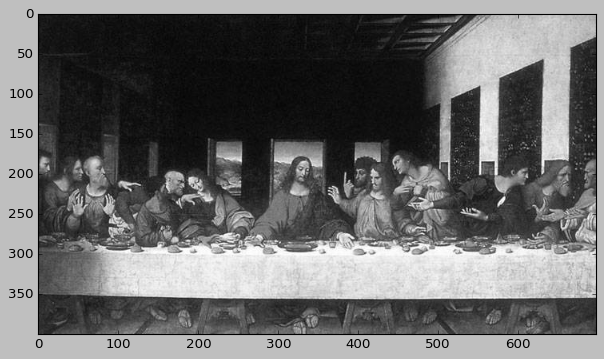

<PIL.Image.Image image mode=LA size=698x400 at 0x7FC8E55D89D0>
_____________________________________
(400, 698)
(400, 400)
(698, 698)
____


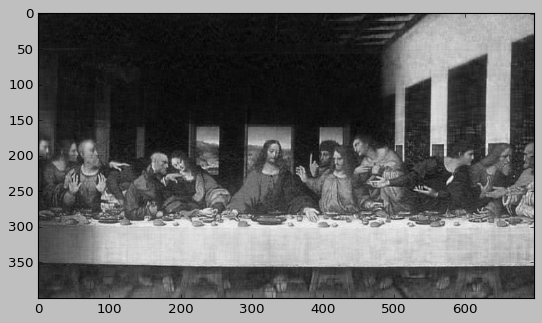

<PIL.Image.Image image mode=LA size=698x400 at 0x7FC8E55D89D0>
(400, 698)
(400, 400)
(698, 698)
Felicidades la imagen está comprimida


In [63]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2017/06/La-ultima-cena.jpg')).convert('LA')

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
print("_____________________________________")
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)
print("____")
nvalue = 70

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
U,D,V = np.linalg.svd(imgmat)
print(img)
print(imgmat.shape)
print(U.shape)
print(V.shape)
print("Felicidades la imagen está comprimida")

##Comentario
Es muy interesante que al comprimir la imagen se mantengan los valores de la imagen inicial. No obstante, hay que tomar en cuenta que al comprimir la imagen sí hay una cierta perdida de calidad, pues mientras más comprimida está, más pixeles de colores similares se transforman en un único color. Qué tanto se debe comprimir la imagen dependiendo del propósito que se tenga para el uso de la misma. Al realizar el Singular Value Decomposition (SVD) podemos ver la aplicación de la comprensión de imagenes, pues lo que buscamos es reducir el tamaño de las dimensiones, manteniendo las más importantes (colores que se mantienen). 

[211. 204. 196. ... 120.  93. 153.]


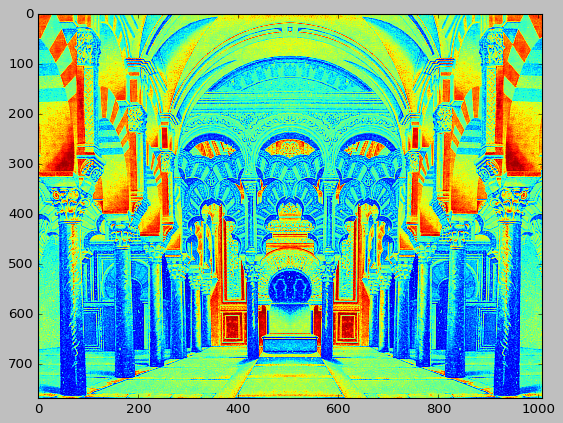

-------------------------------------


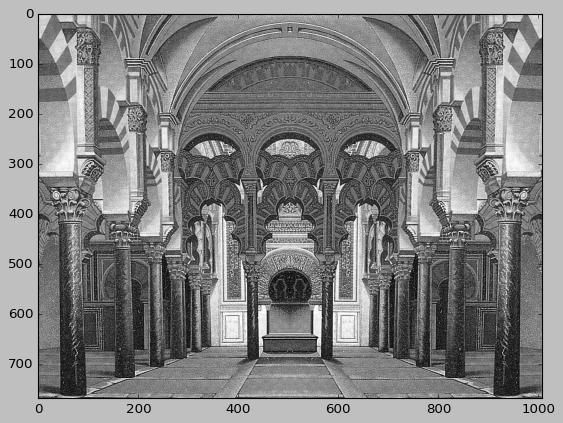

<PIL.Image.Image image mode=LA size=1008x768 at 0x7FC8E57F7D50>
_____________________________________
(768, 1008)
(768, 768)
(1008, 1008)
____


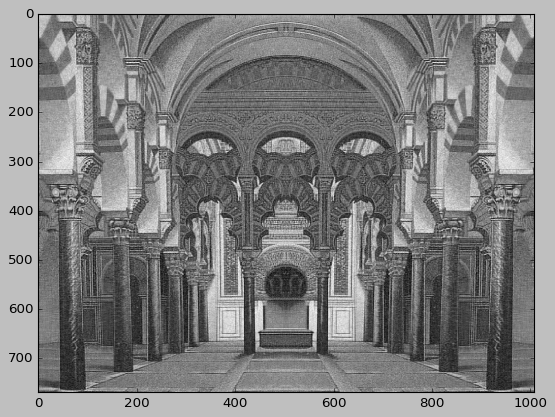

Felicidades la imagen está comprimida


In [68]:
#imagen 2
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2017/05/Mezquita_de_Cordoba.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat)
plt.show()
print("-------------------------------------")
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
print("_____________________________________")
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)
print("____")

nvalue = 90

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.imshow(reconstimg,cmap='gray')
plt.show()
imgmat.shape = (imggray.size[1],imggray.size[0])
print("Felicidades la imagen está comprimida")

##Comentario
En esta imagen me enfoque en los detalles de la misma. Al realizar el SVD lo que ocurre es que se mantienen los valores más importantes; sin embargo, la perdida se suele ver en los detalles. Como podemos ver en la imagen 1 hay muchos detalles, tanto en los arcos como en las columnas. Al realizar el SVD varios de estos detalles comienzan a difuminarse y perdesde con el fondo. Si se hace una gran compresión estos detalles desaparecen casi en su totalidad dejando ver la estructura de la iglesia y algunos tonos con gran contraste. Tomando en cuenta el contraste, llama la atención que pareciera ser que estos tonos parecieran ser catalogrados como importantes, pues la imagen parece mantenerlos aunque la compresión aumente. Esto probablemente se debe al tratamiento que se hizo a la imagen (en la que se ve en colores similares a los de un mapa de calor que va de azules a rojos). Al generar mayor contraste es posible que el SVD busque los valores más extremos y los catalogue como importantes, manteniendo así los contrastes y perdiendo los detalles.

[243. 250. 251. ... 238. 226.  65.]


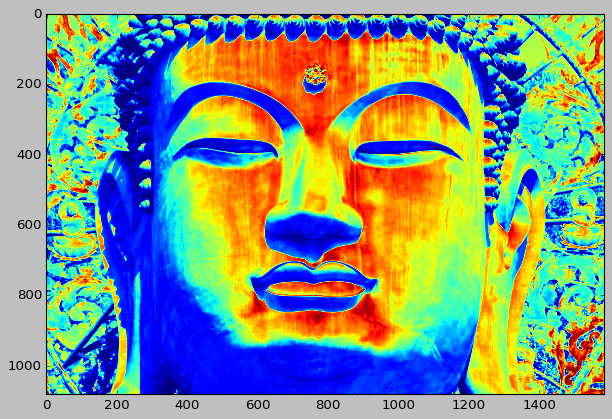

-------------------------------------


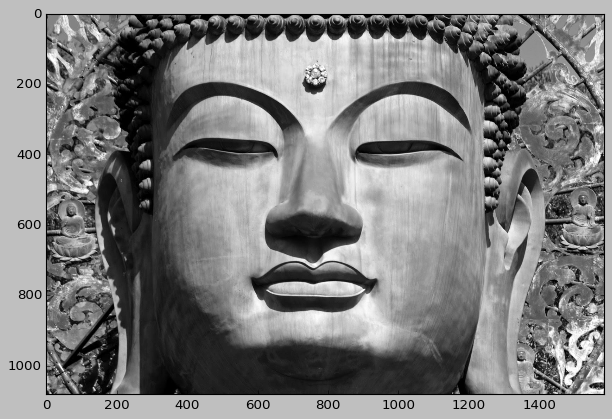

<PIL.Image.Image image mode=LA size=1586x1080 at 0x7FC8E55B39D0>
_____________________________________
(1080, 1586)
(1080, 1080)
(1586, 1586)
____


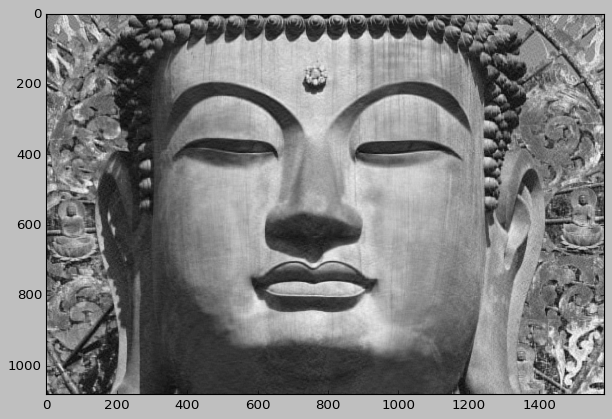

Felicidades la imagen está comprimida


In [71]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2016/07/filosofia-budista.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat)
plt.show()
print("-------------------------------------")
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
print("_____________________________________")
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)
print("____")

nvalue = 110

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg,cmap='gray')
plt.show()
imgmat.shape = (imggray.size[1],imggray.size[0])
print("Felicidades la imagen está comprimida")

##Comentario
En esta ocasión busqué una imagen que tuviera de origen un contraste notorio y que el mismo se resaltara en los detalles (los detalles son oscuros y las partes lisas claras). Al escoger esta imagen con el mismo tratamiento de las anteriores podemos ver que una buena parte de los detalles del rostro se mantienen con cierta definición. Por otra parte, los detalles del fondo (cuyo contraste es menor) disminuyen conforme la compresión aumenta. Aunque este es un trabajo con imágenes, concluyo que es importante el pre-procesamiento que se haga de la información al momento de aplicar un SVD, ya que los valores más importantes pueden tener una razón de ser, ser aleatorios o pudieron escogerse por el tratamiento previo que se le hizo a la información. En el ejemplo de la imagen, si el tratamiento hubiera sido con una escala de tonos más símilares (anaranjado y amarillo, por decir algo) la perdida de información habría sido mayor porque los tonos de por sí son muy similares y los contrasten no se hubieran podido rescatar del todo. 

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

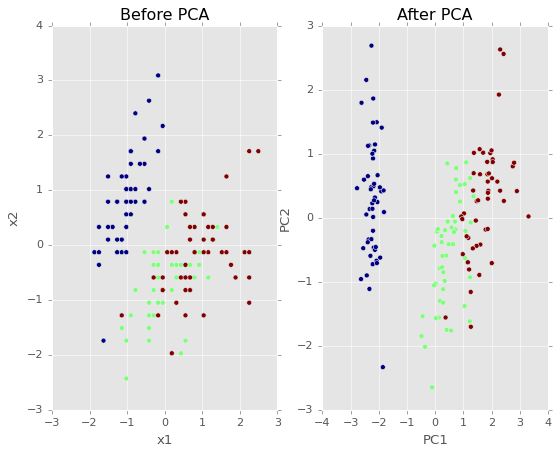

In [14]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [15]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [16]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [17]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [18]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [19]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

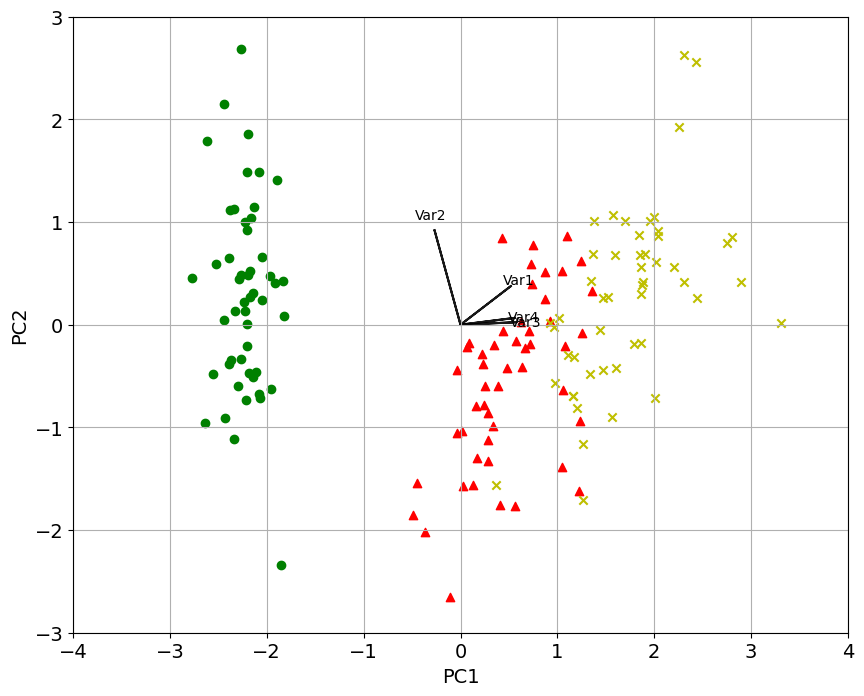

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [21]:
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [22]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

##Comentario
EL PCA nos ayuda a mantener una buena varianza entre nuestros datos. Al implementar el PCA llama la atneción que los valores de color verde se han separado en buena medida de los azules y un tanto de los rojos. Este procedimiento nos ayuda a poder diferencias de mejor forma nuestros datos y así poderlos clasificar de forma adecuada. 
Con el biplot podemos ver la dirección de las scores de cada variable. Var 3 y 4 mantienen un ángulo de casi 90° con Var 1. Ello nos ayuda a visualizar de mejor manera el comportamiento de los componentes en cada variable.
Finalmente con los coeffiecientes de correlaciones nos damos una idea de que variables se parecen entre sí y que variables son las más diferentes. Al asegurarse de que las variables no están correlacionadas aumenta la varianza. Este método puede ser utilizado en distintas áreas, por lo que es flexible y efectivo. 

##Preguntas
* ¿Qué es feature importance y para que nos sirve?

El feature importance nos deja ver cuáles son las variables más importantes dentro del PCA, cuáles tienen mayor carga o son más informativas, por así decirlo. Relacionándolo un poco con el ejercicio de las imágenes donde los contrastes eran los que tenian mayor importancia, aquí obtenemos variables que cargan con esa responsabilidades y designan cuáles valores son preferibles de mantener y cuales pueden "perderse". Al conocer estas variables podemos manejar los datos de una forma distinta, ya que conocemos el impacto de cada variable en nuestro conjunto de datos. Estos son los valores extremos más influyentes en nuestro modelo. 

* ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Dentro del análisis considero que los hallazgos más importantes fueron: las variables más importantes y el gráfico del PCA con los Valores y sus direcciones. Al tener la información de las variables más importantes podemos conocer cómo afecta cada una de las variables al conjunto de datos. Cuando ya tenemos la información de la variable más importante podemos ver nuestros datos desde una nueva perspectiva más sencilla, ya que con el PCA la varianza aumenta. Pienso que el PCA nos ayuda a conocer la importancia de las variables, a obtener una nueva perspectiva de los datos e incluso comprender de mejor forma como se afectan las variables entre sí. 
* ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Los análisis de PCA se pueden utilizar en mercadotecnia interna, en la que se suele considerar a los empleados y trabajos como consumidores y productos. La información se puede extraer tanto de encuestas como de los resultdos que se han obtenido, con toda esta información normalmente se generan grandes conjuntos de datos que pueden procesarse con el PCA para conocer cuales son las variables más importantes. 